In [1]:
import pandas as pd
import numpy as np
from os import listdir

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import CenteredNorm
%matplotlib inline

In [3]:
from sklearn import metrics

In [4]:
def merge_results_frames(df,df2):
    for idx,r in df.iterrows():
        g = r['gamma']
        p = r['bias']
        for col in df.columns:
            if col == 'gamma' or col == 'bias':
                continue
            df.loc[(df['gamma']==g) & (df['bias']==p),col]+=df2.loc[(df2['gamma']==g) & (df2['bias']==p),col]

def str2list(strarray):
    return [float(x) for x in strarray.strip('[] ').split()]

def df_str2list(df):
    for col in df.columns:
        if col == 'gamma' or col == 'bias':
            continue
        df[col] = df[col].apply(str2list)

In [5]:
results_dir='Results/'

resdict = {}
first = True
for filename in listdir(results_dir):
    if first:
        df = pd.read_csv(results_dir+filename)
        df_str2list(df)
        first = False
    else:
        df2 = pd.read_csv(results_dir+filename)
        df_str2list(df2)
        merge_results_frames(df,df2)

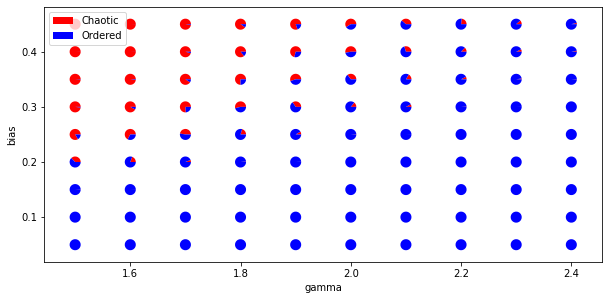

In [6]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
varx = 'gamma'
vary = 'bias'
for _,row in df.iterrows():
    x = np.mean(row[varx])
    y = np.mean(row[vary])
    ones = np.mean([derrida > 1 for derrida in row['Derrida']])
    ax.pie([ones, 1-ones], center=(x, y), radius=0.01, colors=['r', 'b'], frame=True)
    ones = [derrida > 1 for derrida in row['Derrida']]
    

legend_elements = [Patch(facecolor='r', label='Chaotic'), Patch(facecolor='b', label='Ordered')]
plt.xlabel(varx)
plt.ylabel(vary)
ax.legend(handles=legend_elements, loc='best')

In [7]:
dictall = {}
for _,row in df.iterrows():
    for col in df.columns:
        if col in ['gamma','bias']:
            rowlist = [row[col]]*len(row['Derrida'])
        else:
            rowlist = row[col]
        if col in dictall:
            dictall[col] += rowlist
        else:
           dictall[col] = rowlist.copy()
           
dfall = pd.DataFrame(dictall)

dfall['avgS']=dfall['avgKe']-dfall['avgKc']
dfall['avgSe']=3.33*dfall['avgKe']*dfall['bias']*(1-dfall['bias'])
dfall['avgSk']=2*dfall['avgK']*dfall['bias']*(1-dfall['bias'])
dfall['regime']=(dfall['Derrida']>1).astype(int) - (dfall['Derrida']<1).astype(int)
dfall['bve']=dfall['avgSe']/(2*dfall['avgK'])
dfall['avgSe_sample']=3.33*dfall['avgKe']*dfall['bve']
dfall=dfall.sample(frac = 1)
dfall

,gamma,bias,Derrida,avgK,medK,avgKe,medKe,avgKc,medKc,avgS,avgSe,avgSk,regime,bve,avgSe_sample
763,1.5,0.10,0.460,2.65,2.0,1.062770,0.0,0.566631,0.0,0.496140,0.318512,0.47700,-1,0.060097,0.212683
33955,2.4,0.35,0.809,1.71,1.0,0.990519,1.0,0.202106,0.0,0.788413,0.750393,0.77805,-1,0.219413,0.723718
19477,2.0,0.25,0.763,2.39,1.0,1.266651,1.0,0.431873,0.0,0.834778,0.790865,0.89625,-1,0.165453,0.697872
699,1.5,0.10,0.511,3.10,2.0,1.319910,0.0,0.787113,0.0,0.532797,0.395577,0.55800,-1,0.063803,0.280432
5024,1.6,0.20,0.865,2.65,1.5,1.363751,1.0,0.530174,0.0,0.833577,0.726607,0.84800,-1,0.137096,0.622591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,1.6,0.10,0.546,3.03,2.0,1.237770,0.0,0.722709,0.0,0.515062,0.370960,0.54540,-1,0.061214,0.252312
28832,2.3,0.10,0.250,1.53,1.0,0.425506,0.0,0.178871,0.0,0.246636,0.127524,0.27540,-1,0.041675,0.059050
26837,2.2,0.30,0.710,1.69,1.0,0.884816,1.0,0.167277,0.0,0.717539,0.618752,0.70980,-1,0.183063,0.539382
33795,2.4,0.30,0.606,1.61,1.0,0.770014,1.0,0.146498,0.0,0.623516,0.538471,0.67620,-1,0.167227,0.428794


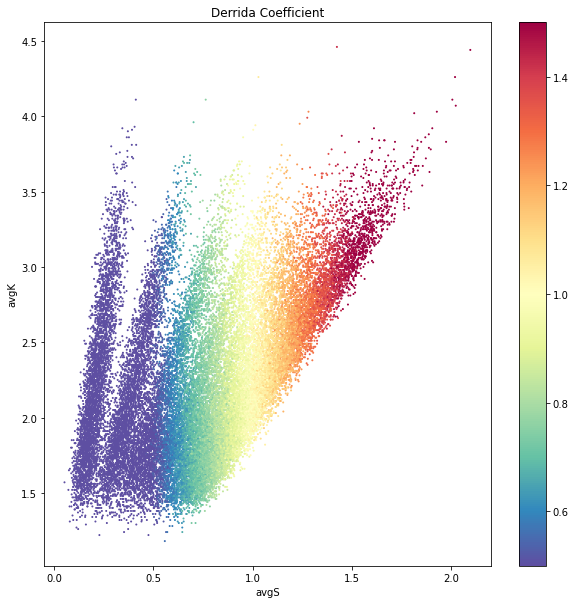

In [8]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgS'
vary = 'avgK'
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.show()

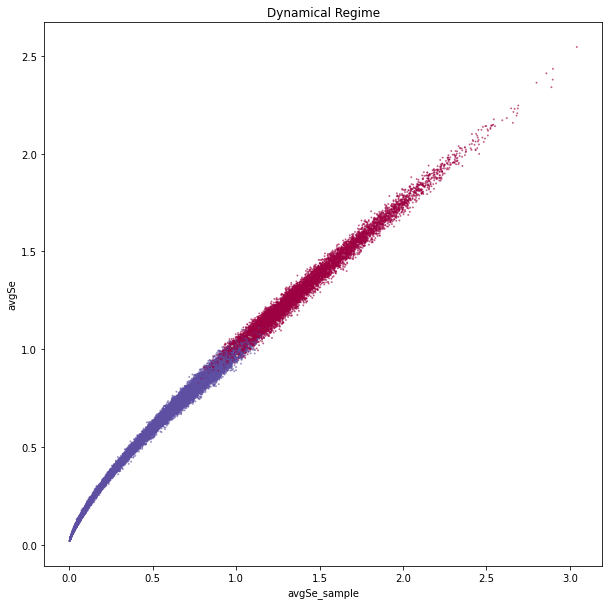

In [9]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgSe_sample'
vary = 'avgSe'
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['regime'],cmap=cmap,norm=CenteredNorm(vcenter=0,halfrange=1.0),alpha=0.5)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title("Dynamical Regime")
plt.show()

In [10]:
max([(np.mean(dfall['regime']==((dfall['avgSk']*scale>1).astype(int)-(dfall['avgSk']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9606837606837607, 1.0014999999999448)

In [11]:
max([(np.mean(dfall['regime']==((dfall['avgSe_sample']*scale>1).astype(int)-(dfall['avgSe_sample']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9618518518518518, 0.9929999999999457)

In [12]:
max([(np.mean(dfall['regime']==((dfall['avgSe']*scale>1).astype(int)-(dfall['avgSe']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9676923076923077, 0.9979999999999452)

In [13]:
max([(np.mean(dfall['regime']==((dfall['avgS']*scale>1).astype(int)-(dfall['avgS']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9785754985754985, 1.0019999999999447)

In [14]:
regime_truth = dfall['regime']
regime_S = ((dfall['avgS']>1).astype(int)-(dfall['avgS']<1).astype(int))
regime_Se = ((dfall['avgSe']>1).astype(int)-(dfall['avgSe']<1).astype(int))
regime_Sk = ((dfall['avgSk']>1).astype(int)-(dfall['avgSk']<1).astype(int))

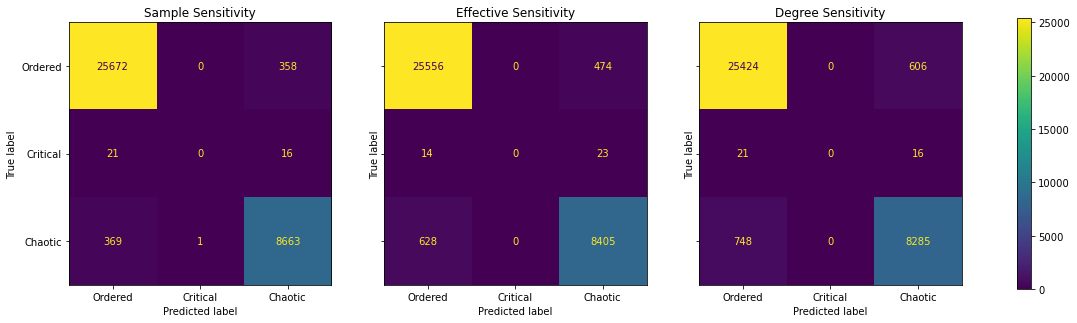

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey='row', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[2])
cm_display.im_.colorbar.remove()
ax[2].set_title('Degree Sensitivity')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()